## Initial Setting
* Importing packages and dataset

In [1]:
# Standard Libs
from matplotlib.ticker import FuncFormatter
import os
import pandas as pd
import matplotlib.pyplot as plt

# ChatGPT Integration
# If you haven't installed openai, uncomment and run this cell
# import sys
# !{sys.executable} -m pip install openai
import time
from openai import OpenAI


# Load clustered dataset
path_clustered = os.path.join('..', 'data', 'clustered_class.csv')
df_clustered = pd.read_csv(path_clustered)

---

## Visualization
* Draw cluster distribution for specific columns


【cutomized_slot_and_student】
|   kmodes_label |   After-school Tutoring_1-5 |   After-school Tutoring_11-20 |   After-school Tutoring_21+ |   After-school Tutoring_6-10 |   During Class_1-5 |   During Class_11-20 |   During Class_21+ |   During Class_6-10 |   Morning Self-study_1-5 |   Morning Self-study_11-20 |   Morning Self-study_21+ |   Morning Self-study_6-10 |   Others_1-5 |   Others_11-20 |   Others_21+ |   Others_6-10 |
|---------------:|----------------------------:|------------------------------:|----------------------------:|-----------------------------:|-------------------:|---------------------:|-------------------:|--------------------:|-------------------------:|---------------------------:|-------------------------:|--------------------------:|-------------:|---------------:|-------------:|--------------:|
|              0 |                   0.14      |                     0.04      |                   0         |                     0.18     |          0.12      |  

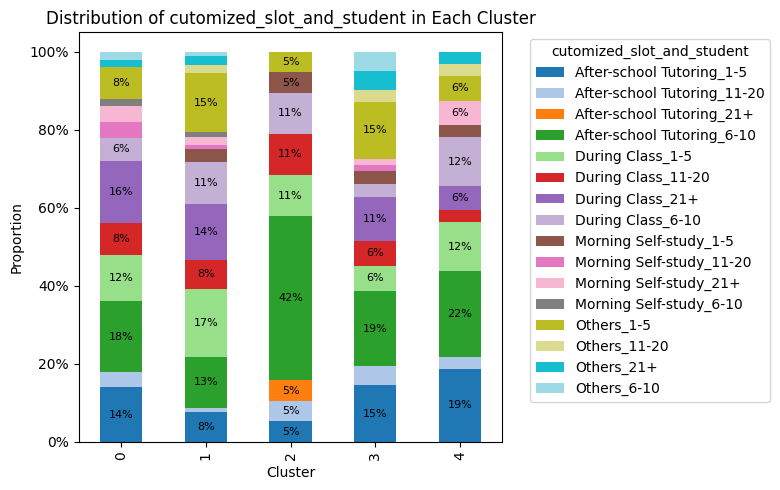

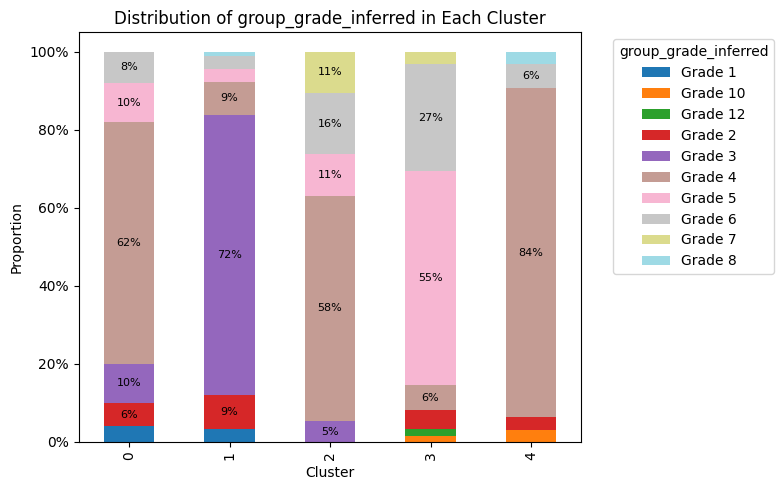

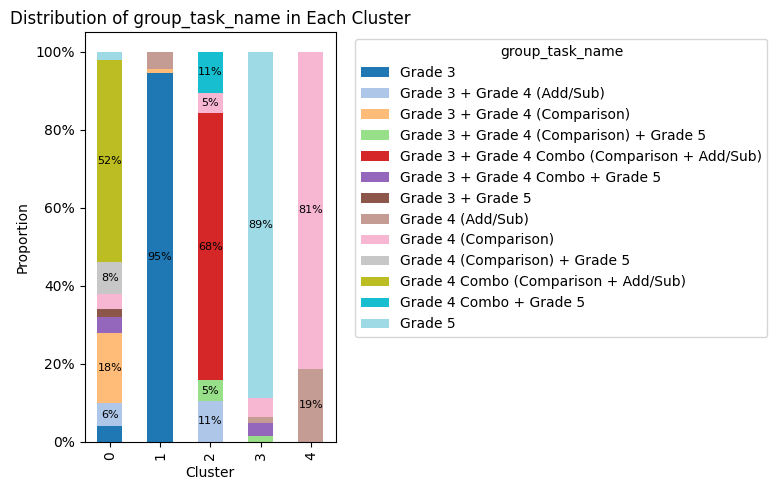

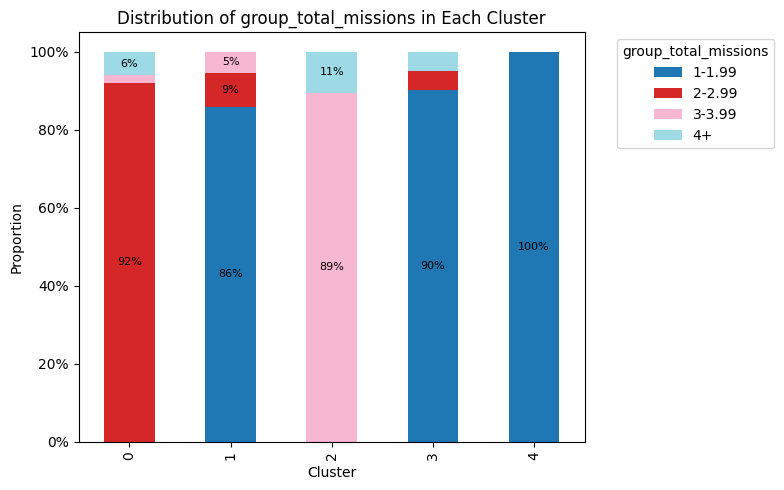

In [2]:
crosstab_tables = {}
cluster_counts = df_clustered['kmodes_label'].value_counts().to_dict()

for col in [
      'cutomized_slot_and_student',
      'group_grade_inferred',
      'group_task_name',
      'group_total_missions'
      ]:

      result = pd.crosstab(df_clustered['kmodes_label'], df_clustered[col], normalize='index').to_markdown()
      crosstab_tables[col] = result

# Transform to string
table_str = ""
for col, table in crosstab_tables.items():
    table_str += f"\n【{col}】\n{table}\n"
print(table_str)

# Distribution plots
for col in [
      'cutomized_slot_and_student',
      'group_grade_inferred',
      'group_task_name',
      'group_total_missions'
      ]:
    ct = pd.crosstab(df_clustered['kmodes_label'], df_clustered[col], normalize='index')
    ax = ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab20')
    plt.title(f'Distribution of {col} in Each Cluster')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.ylabel('Proportion')
    plt.xlabel('Cluster')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

    # Add percentage
    for c in ax.containers:
        labels = [f"{v.get_height():.0%}" if v.get_height() > 0.05 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

    plt.show()

---

## ChatGPT Integration

This section uses OpenAI's GPT-4o to interpret clustering results from the perspective of an education data analyst, generating cluster names and summaries understandable to non-technical stakeholders (e.g., teachers, school officials).
To reflect the context of Taiwan’s education system, the prompt was written primarily in Chinese.

> For reproducibility and security, the actual API key and GPT response call have been removed from the public notebook.  
> The final output was saved and included below for reference.

In [ ]:
def generate_cluster_summary_from_chatgpt(cluster_counts, table_str, model='gpt-4o'):

    """
    Generate cluster summary using OpenAI GPT model.

    Parameters:
    -----------
    cluster_counts : str
        Text summary showing how many samples are in each cluster.
    table_str : str
        Formatted table showing the distribution of features across clusters.
    model : str
        OpenAI model name (default: 'gpt-4o').
    api_key : str or None
        Optional. If not provided, will attempt to read from environment variable 'OPENAI_API_KEY'.

    Returns:
    --------
    str : GPT-generated markdown report describing each cluster
    """

    api_key = "your-api-key-here"  # Fill in your own key
    client = OpenAI(api_key=api_key)

    prompt_template = f"""
    以下是班級分群的特徵，請你根據每群在特定欄位中的數據幫我進行群體命名與行為描述，並以「Markdown 表格格式回傳」說明每群的特徵、可能代表的教學行為模式，以及判斷的標準，格式需方便直接複製貼上至 Notion。
    其中，欄位包含「班級活動時間與學生人數（cutomized_slot_and_student）」、「班級年級（group_grade_inferred）」、 「教材組合（group_task_name）」，以及「班級任務數（group_total_missions）。
    在接下來的資訊中，會包含在這些欄位中各個群體的分布與佔比。請你以專業的教育背景的統計專家的角色，並以非技術背景的教育工作者能理解的方式，根據上述的各群體分布與佔比撰寫一份針對各個群體的分析表格。
    注意，群體命名請以「班級活動時間與學生人數佔比」這項為主，來形容在這個條件下其他特徵的趨勢為何。另外，命名希望可以盡量簡潔有力。
    分析表格需要的欄位有：分群標籤、群體人數、群體命名、綜合特徵描述、教學行為模式、判斷標準、班級活動時間與學生人數佔比、班級年級佔比、教材組合佔比、班級任務數佔比，表格的內容請以「英文」呈現。

    分群人數如下：
    {cluster_counts}

    各群體在各個欄位的分布與佔比摘要如下：
    {table_str}
        """

    print("⏳ 開始產生 ChatGPT 分群分析摘要...")

    start_time = time.time()

    # Call API
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "你是一位熟悉教育資料分析的專家，請根據教師分群的特徵數據進行清楚易懂的解釋。"},
            {"role": "user", "content": prompt_template}
        ],
        temperature=0.5
    )

    end_time = time.time()
    elapsed_time = round(end_time - start_time, 2)

    print(f"✅ 分群摘要完成，用時：{elapsed_time} 秒\n")

    return response.choices[0].message.content

# Call ChatGPT to analyze
report = generate_cluster_summary_from_chatgpt(cluster_counts, table_str)
print(report)

⏳ 開始產生 ChatGPT 分群分析摘要...
✅ 分群摘要完成，用時：19.85 秒

```markdown
| Cluster Label | Group Size | Group Name                      | Comprehensive Feature Description                                                                                       | Teaching Behavior Pattern                                               | Judgment Criteria                                                                                                                                                        | Activity Time & Student Ratio | Grade Ratio                 | Material Combination Ratio                    | Task Number Ratio          |
|---------------|------------|---------------------------------|--------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------